In [1]:
# Data Handling & Visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.neural_network import MLPClassifier

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Train set shape: (120, 4)
Test set shape: (30, 4)


In [3]:
scaler = StandardScaler()

# Fit on training data ONLY
scaler.fit(X_train)

# Transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Create MLPClassifier model
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5, 5, 5),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

# Train the model
mlp.fit(X_train_scaled, y_train)

,hidden_layer_sizes,"(5, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [5]:
# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Model Accuracy: 36.67%

Classification Report:
              precision    recall  f1-score   support

      setosa       0.34      1.00      0.51        10
  versicolor       0.00      0.00      0.00        10
   virginica       1.00      0.10      0.18        10

    accuracy                           0.37        30
   macro avg       0.45      0.37      0.23        30
weighted avg       0.45      0.37      0.23        30



c:\Users\LOBSTER69\Documents\WORK\Teaching work\2025\เทอม_01\ENGCE207_Advanced Topics in Computer Engineering_หัวข้อความก้าวล้าในงานวิศวกรรมคอมพิวเตอร์\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\LOBSTER69\Documents\WORK\Teaching work\2025\เทอม_01\ENGCE207_Advanced Topics in Computer Engineering_หัวข้อความก้าวล้าในงานวิศวกรรมคอมพิวเตอร์\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\LOBSTER69\Documents\WORK\Teaching work\2025\เทอม_01\ENGCE207_Advanced Topics 

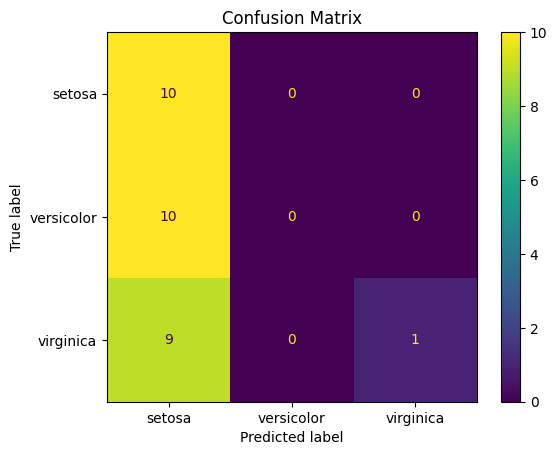

In [6]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
